# SVM

<td>
    <a href="https://colab.research.google.com/github/nikitaosovskiy/hadnson_ml/blob/main/06-support_vector_machine/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td>

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_openml, fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from scipy.stats import reciprocal, uniform 

%matplotlib inline

# 1 Task

## Load data

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris['data'][:, (2, 3)]

In [4]:
y = (iris['target'] == 2).astype(np.float64)

## Looking for data

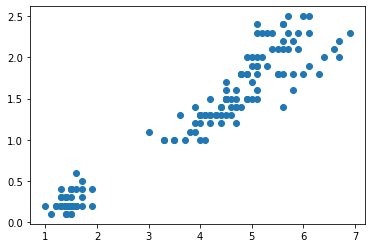

In [5]:
plt.scatter(X[:, 0], X[:, 1])

## Training Models

### LinearSVC

In [6]:
lin_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearSVC(C=1, loss='hinge'))
])

In [7]:
lin_svc.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LinearSVC(C=1, loss='hinge'))])

In [8]:
lin_svc_pred = lin_svc.predict(X)

In [9]:
accuracy_score(y, lin_svc_pred)

0.96

### SVC

In [10]:
svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel='linear', C=1)),
])

In [11]:
svc_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=1, kernel='linear'))])

In [12]:
svc_clf_pred = svc_clf.predict(X)

In [13]:
accuracy_score(y, svc_clf_pred)

0.9533333333333334

### SGDClassifier

In [14]:
m = len(X)
C = 1

sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SGDClassifier(loss='hinge', alpha=1 / (m * C)))
])

In [15]:
sgd_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SGDClassifier(alpha=0.006666666666666667))])

In [16]:
sgd_clf_pred = sgd_clf.predict(X)

In [17]:
accuracy_score(y, sgd_clf_pred)

0.96

# 2 Task

## Load data

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

## Training model

In [5]:
mini_X_train = X_train[:10000]
mini_y_train = y_train[:10000]

### OvR

In [6]:
ovr_clf = OneVsRestClassifier(SVC())

In [7]:
ovr_clf.fit(mini_X_train, mini_y_train)

OneVsRestClassifier(estimator=SVC())

In [8]:
y_predicted = ovr_clf.predict(mini_X_train)

In [9]:
accuracy_score(mini_y_train, y_predicted)

0.9841

### SGDClassifier

In [10]:
sgd_clf = SGDClassifier()

In [11]:
sgd_clf.fit(mini_X_train, mini_y_train)

SGDClassifier()

In [12]:
y_predicted = sgd_clf.predict(mini_X_train)

In [13]:
accuracy_score(mini_y_train, y_predicted)

0.9356

## Tuning model

In [14]:
ovr_clf = OneVsRestClassifier(SVC())

In [21]:
param_grid = [
    {'estimator__kernel':['linear'], 'estimator__C': [1, 10, 30, 100, 300, 1000, 3000]},
    {'estimator__kernel':['rbf'], 'estimator__C': [0.0001, 0.001, 0.01, 0.1, 1, 3, 10, 30, 100],
    'estimator__gamma':[1, 5, 10, 15, 50, 100]},
    {'estimator__kernel':['poly'], 'estimator__C': [1, 10, 30, 100, 300, 1000, 3000], 
    'estimator__degree':[2, 3, 4], 'estimator__coef0':[0.1, 0.3, 1., 3.]}
]

grid_search = GridSearchCV(ovr_clf, param_grid, cv=5, 
                           scoring='accuracy',
                          return_train_score=True)

grid_search.fit(mini_X_train[:1000], mini_y_train[:1000])

GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid=[{'estimator__C': [1, 10, 30, 100, 300, 1000, 3000],
                          'estimator__kernel': ['linear']},
                         {'estimator__C': [0.0001, 0.001, 0.01, 0.1, 1, 3, 10,
                                           30, 100],
                          'estimator__gamma': [1, 5, 10, 15, 50, 100],
                          'estimator__kernel': ['rbf']},
                         {'estimator__C': [1, 10, 30, 100, 300, 1000, 3000],
                          'estimator__coef0': [0.1, 0.3, 1.0, 3.0],
                          'estimator__degree': [2, 3, 4],
                          'estimator__kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [31]:
grid_search.best_score_

0.908

In [32]:
best_model = grid_search.best_estimator_

In [34]:
best_model.fit(mini_X_train, mini_y_train)

OneVsRestClassifier(estimator=SVC(C=1, coef0=0.3, kernel='poly'))

In [35]:
y_predicted = best_model.predict(mini_X_train)

In [36]:
accuracy_score(mini_y_train, y_predicted)

0.9963

## Evaluate model

In [37]:
best_model = grid_search.best_estimator_

In [38]:
best_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1, coef0=0.3, kernel='poly'))

In [39]:
y_test_pred = best_model.predict(X_test)

In [40]:
accuracy_score(y_test, y_test_pred)

0.9832

# 3 Task

## Load data

In [43]:
housing = fetch_california_housing()

In [45]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [46]:
X = housing['data']
y = housing['target']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Model Training

### LinearSVR

In [55]:
lin_svr = LinearSVR(random_state=42)

lin_svr.fit(X_train_scaled, y_train)

/mnt/d/Projects/handson_ml/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [57]:
y_pred = lin_svr.predict(X_train_scaled)

In [60]:
mse = mean_squared_error(y_train, y_pred)
print('RMSE: ', np.sqrt(mse))

RMSE:  0.9819256687727764


### SVR

In [69]:
svr = SVR()

svr.fit(X_train_scaled, y_train)

SVR()

In [70]:
y_pred = svr.predict(X_train_scaled)

In [71]:
mse = mean_squared_error(y_train, y_pred)
print('RMSE: ', np.sqrt(mse))

RMSE:  0.5797673265358964


## Model Tuning

In [80]:
random_params = [
    {'degree': [2, 3, 4, 5], 'epsilon': reciprocal(0.01, 3), 
    'C': uniform(1, 10), 'gamma': reciprocal(0.001, 0.1)}
]

rnd_search = RandomizedSearchCV(SVR(), random_params, n_iter=15, verbose=2, cv=3, random_state=42)
rnd_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END C=4.745401188473625, degree=2, epsilon=0.028470180255100654, gamma=0.03625617634576227; total time=   6.5s
[CV] END C=4.745401188473625, degree=2, epsilon=0.028470180255100654, gamma=0.03625617634576227; total time=   6.5s
[CV] END C=4.745401188473625, degree=2, epsilon=0.028470180255100654, gamma=0.03625617634576227; total time=   6.5s
[CV] END C=6.96850157946487, degree=3, epsilon=0.02434542396201692, gamma=0.0013066739238053278; total time=   6.1s
[CV] END C=6.96850157946487, degree=3, epsilon=0.02434542396201692, gamma=0.0013066739238053278; total time=   5.8s
[CV] END C=6.96850157946487, degree=3, epsilon=0.02434542396201692, gamma=0.0013066739238053278; total time=   5.8s
[CV] END C=9.661761457749352, degree=5, epsilon=0.022589074163015747, gamma=0.020034427927560723; total time=   6.4s
[CV] END C=9.661761457749352, degree=5, epsilon=0.022589074163015747, gamma=0.020034427927560723; total time=   6.2s
[CV] END 

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=15,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf3cc45100>,
                                         'degree': [2, 3, 4, 5],
                                         'epsilon': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf054847c0>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf05459b50>}],
                   random_state=42, verbose=2)

In [82]:
rnd_search.best_params_

{'C': 4.745401188473625,
 'degree': 2,
 'epsilon': 0.028470180255100654,
 'gamma': 0.03625617634576227}

## Evaluate model

In [87]:
best_model = rnd_search.best_estimator_

In [88]:
best_model.fit(X_train_scaled, y_train)

SVR(C=4.745401188473625, degree=2, epsilon=0.028470180255100654,
    gamma=0.03625617634576227)

In [89]:
y_pred = best_model.predict(X_train_scaled)

In [92]:
mse = mean_squared_error(y_train, y_pred)
print('RMSE:', np.sqrt(mse))

RMSE: 0.6037059405455045


In [93]:
y_test_pred = best_model.predict(X_test_scaled)

In [94]:
mse = mean_squared_error(y_test, y_test_pred)
print('RMSE:', np.sqrt(mse))

RMSE: 0.6213511436981897
